In [221]:
# Load datasets and store in dictionaries
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import SelectFromModel, RFE, RFECV
from sklearn.linear_model import ElasticNet, ElasticNetCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, classification_report
from sklearn.svm import SVR
from abess import LinearRegression
from abess.decomposition import SparsePCA
from kennard_stone import train_test_split as ks_train_test_split
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
import numpy as np
import os
import synths

AttributeError: module 'synths' has no attribute 'like_cheese'

In [167]:
def get_y_value(path):
    Y_value = pd.read_csv(path, index_col=0)
    Y_value.reset_index(inplace=True, drop=True)
    return Y_value

def get_x_value(path):
    X = pd.read_csv(path, sep='\t', index_col=0, low_memory=False)
    X.reset_index(inplace=True, drop=True)
    X.drop('NAME', axis=1, inplace=True)
    return X

In [168]:
y_values = dict()
for item in os.listdir('.'):
    if '.csv' in item:
        y_values[item[:-4]] = get_y_value(item)

In [169]:
x_values = dict()
for item in os.listdir('.'):
    if '.txt' in item:
        x_values[item[5:-4]] = get_x_value(item)

In [161]:
quartile = pd.qcut(y_values['noMetalsNoMixes']['PCE'], q=4, retbins=True)
quartile[1][3]

5.8925

In [34]:
def add_family_to_x(y_dict, x_dict):
    x_dict_plus_fam = dict()
    for dataset in y_dict:
        dataset_plus_fam = pd.concat([x_dict[dataset], y_dict[dataset]['Molecule keywords']], axis=1)
        x_dict_plus_fam[dataset] = dataset_plus_fam
    return x_dict_plus_fam
        

In [162]:
def convert_PCE_to_active(y_dict):
    for dataset in y_dict:
        pce_quartiles = pd.qcut(y_dict[dataset]['PCE'], q=4, retbins=True)
        y_dict[dataset]['active'] = np.where(y_dict[dataset]['PCE']>pce_quartiles[1][3], 1, 0)
    return y_dict

In [226]:
X_dict = add_family_to_x(y_values, x_values)

In [227]:
top_compound_families = top_families(7, y_values)

In [228]:
Y_dict = convert_PCE_to_active(y_values)

Y_dict['noMetalsNoMixes']

,VOC,JSC,FF,PCE,Electrolyte,Active area,Co-adsorbent,Co-sensitizer,Semiconductor,Dye loading,...,Article year.1,Article electronic id,Article keywords,Molecule SMILE,Molecule keywords,Molecule spectrum absorption maxima,Molecule spectrum emission maxima,Molecule spectrum solvent,Dragon Name,active
0,687.0,10.79,0.70,5.19,Iodide_Triiodide,-,-,-,TiO2 (20 nm particle size),-,...,Hong_2012,NaN,NaN,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...,phenothiazine,439.0,576.0,CH2Cl2/MeOH (1:1),phenothiazine 5.19,0
1,678.0,13.20,0.67,6.00,Iodide_Triiodide,0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,...,Alibabaei_2010,NaN,NaN,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,other,465.0,640.0,dichloromethane,"coumarin, triphenylamine 6.0",1
2,695.0,12.20,0.74,6.20,Iodide_Triiodide,0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,...,Alibabaei_2010,NaN,NaN,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...,other,460.0,590.0,dichloromethane,"coumarin, triphenylamine 6.2",1
3,800.0,9.00,0.76,5.50,Iodide_Triiodide,0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,...,Alibabaei_2010,NaN,NaN,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...,other,454.0,525.0,dichloromethane,"coumarin, triphenylamine 5.5",0
4,560.0,3.41,0.73,1.39,Iodide_Triiodide,0.16,-,-,TiO2 film,-,...,Han_2014,NaN,NaN,CCN([C@@H]1C=Cc2c(C1)oc(=O)c(c2)c1ccc(cc1)c1cc...,coumarin,465.0,490.0,Acetonitrile-DMSO,coumarin 1.39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,740.0,14.56,0.68,7.39,Iodide_Triiodide,-,-,-,TiO2 film,-,...,Ruangsupapichat_2018,NaN,NaN,C(CCCCC)N1C=2C=CC(=CC2C=2N(C=3C=CC(=CC3C21)/C=...,indoline,411.0,NaN,methanol,indoline 7.39,1
1432,651.0,9.93,0.70,4.52,Iodide_Triiodide,0.12 cm2,-,-,TiO2 film 14 um,296 nmol/cm2,...,Liao_2018,NaN,NaN,C(#N)/C(/C(=O)O)=C\C=1SC(=CC1)C=1C=CC=2N(C3=CC...,phenothiazine,473.0,NaN,CH2Cl2/EtOH,phenothiazine 4.52,0
1433,667.0,12.85,0.71,6.09,Iodide_Triiodide,0.12 cm2,-,-,TiO2 film 14 um,224 nmol/cm2,...,Liao_2018,NaN,NaN,CSC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,phenothiazine,472.0,NaN,CH2Cl2/EtOH,phenothiazine 6.09,1
1434,659.0,12.46,0.69,5.65,Iodide_Triiodide,0.12 cm2,-,-,TiO2 film 14 um,187 nmol/cm2,...,Liao_2018,NaN,NaN,COC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,phenothiazine,470.0,NaN,CH2Cl2/EtOH,phenothiazine 5.65,0


In [9]:
def top_families(n_families, y_dict):
    top_families = dict()
    for dataset in y_dict:
        family_list = list(y_dict[dataset].groupby(['Molecule keywords']).count().sort_values('PCE', ascending=False).head(n_families).index)
        top_families[dataset] = family_list
    return top_families

In [11]:
def rename_uncommon_families(top_families, x_dict):
    for dataset in x_dict:
        x_dict[dataset].loc[(~x_dict[dataset]['Molecule keywords'].isin(top_families[dataset])), 'Molecule keywords'] = 'other'
#         for family in top_families[dataset]:
#             df_x = x_dict[dataset].loc[x_dict[dataset]['Molecule keywords'].isin(top_families[dataset])]
#             trimmed_x[dataset] = df_x   
    return x_dict

In [229]:
X_dict_bias = rename_uncommon_families(top_compound_families, X_dict)

In [230]:
Y_dict_bias = rename_uncommon_families(top_compound_families, Y_dict)

In [231]:
X_dict_bias['HadarDataSet'].groupby(['Molecule keywords']).count().sort_values('MW', ascending=False)

,MW,AMW,Mp,Mi,nTA,nBM,RBF,nDB,nTB,nN,...,s4_numSharedNeighbors,s1_numRotBonds,s2_numRotBonds,s3_numRotBonds,s4_numRotBonds,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s34_phSize,s34_phRelSize
Molecule keywords,,,,,,,,,,,,,,,,,,,,,
triphenylamine,564,564,564,564,564,564,564,564,564,564,...,564,564,564,564,564,564,564,564,564,564
other,340,340,340,340,340,340,340,340,340,340,...,340,340,340,340,340,340,340,340,340,340
phenothiazine,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,241
carbazole,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
indoline,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
coumarin,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
diphenylamine,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


In [232]:
def ordinalEncode_compound_family(X):
    X_encoded = dict()
    for dataset in X:
        encoder = OrdinalEncoder()
        X[dataset][['Molecule keywords']] = encoder.fit_transform(X[dataset][['Molecule keywords']])
        X[dataset]['Molecule keywords'] = X[dataset]['Molecule keywords'].astype(int)
        X_encoded[dataset] = X[dataset]
    
    return X_encoded

In [140]:
X_raw = ordinalEncode_compound_family(X_dict_bias)

In [63]:
X_raw['metalsNoMixes'].groupby(['Molecule keywords']).count().sort_values('MW', ascending=False)

,MW,AMW,Mp,Mi,GD,nTA,RBN,RBF,nDB,nTB,...,F10[O-X],F10[S-S],F10[S-X],Hy,TPSA(NO),TPSA(Tot),ESOL,SAdon,BLTF96,SAscore
Molecule keywords,,,,,,,,,,,,,,,,,,,,,
6,559,559,559,559,559,559,559,559,559,559,...,559,559,559,559,559,559,559,559,559,559
3,349,349,349,349,349,349,349,349,349,349,...,349,349,349,349,349,349,349,349,349,349
4,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,241
5,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,201
0,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139
2,111,111,111,111,111,111,111,111,111,111,...,111,111,111,111,111,111,111,111,111,111
1,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47


In [223]:
def multi_train_test_split(x_dict, y_dict):
    all_cases = dict()
    for dataset in y_dict:
        train_test_dict = dict()
        X_train, X_test, Y_train, Y_test = train_test_split(x_dict[dataset], y_dict[dataset]['active'], test_size=0.5, stratify=y_dict[dataset]['active'])
        train_test_dict['X_train'] = X_train
        train_test_dict['X_test'] = X_test
        train_test_dict['Y_train'] = Y_train
        train_test_dict['Y_test'] = Y_test
        all_cases[dataset] = train_test_dict
    return all_cases

In [111]:
def compound_families(x_dict, y_dict, families):
    families.append('other')
    X = dict()
    Y = dict()
    for i in range(len(families)):
        df_X = x_dict.loc[(x_dict['Molecule keywords']==families[i])].drop('Molecule keywords', axis=1)
        df_Y = y_dict.loc[(y_dict['Molecule keywords']==families[i])].drop('Molecule keywords', axis=1)
        X[families[i]] = df_X
        Y[families[i]] = df_Y
    return X, Y

In [237]:
X_families, Y_families = compound_families(X_dict_bias['metalsMixes'], Y_dict_bias['metalsMixes'], top_compound_families['metalsMixes'])

In [234]:
Y_families['triphenylamine']

,SMILES,Electrolyte,Semiconductor,Solar simulator,Article DOI,Molecule spectrum absorption maxima,Molecule spectrum emission maxima,VOC,JSC,FF,PCE,active
366,N#C/C(=C/c1cn(c2c1cccc2)c1ccc(cc1)N(c1ccccc1)c...,Iodide_Triiodide,TiO2,AM 1.5G 100mW/cm2,10.1016/j.synthmet.2015.10.024,375.0,NaN,680.0,4.39,0.710,2.15,0
430,CCCCCCOc1cc(OCCCCCC)ccc1c1ccc(cc1)N(c1ccc(cc1)...,Iodide_Triiodide,TiO2,AM 1.5G 100mW/cm2,10.1021/am403210v,628.0,NaN,560.0,12.60,0.723,5.10,0
471,CCCCCCC(Cc1cc(sc1c1cc2c(s1)c1sc(cc1c1c2non1)c1...,Iodide_Triiodide,TiO2,AM 1.5G 100mW/cm2,10.1021/am5067145,462.0,658.0,700.0,12.60,0.710,6.18,1
488,N#C/C(=C\c1sc(c2c1OCC(CO2)(C)C)c1sc(c2c1OCC(CO...,Iodide_Triiodide,TiO2,AM 1.5G 100mW/cm2,10.1021/ol902973r,499.0,NaN,756.0,9.54,0.620,4.45,0
512,CCCCCCSc1ccc(cc1)N(c1ccc(cc1)SCCCCCC)c1ccc(cc1...,Iodide_Triiodide,TiO2,AM 1.5G 100mW/cm2,10.1039/c5ra03530a,510.0,573.0,716.0,16.20,0.630,7.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1458,N#CC(=Cc1ccc(s1)c1nc(c(s1)c1ccc(cc1)N(c1ccc(cc...,Iodide_Triiodide,TiO2,AM 1.5G 100mW/cm2,10.1016/j.dyepig.2012.02.014,505.0,640.0,558.0,1.42,0.510,0.41,0
1459,N#CC(=Cc1ccc(s1)c1nc(c(s1)c1ccc(cc1)N(c1ccc(cc...,Iodide_Triiodide,TiO2,AM 1.5G 100mW/cm2,10.1016/j.dyepig.2012.02.014,503.0,611.0,519.0,1.81,0.460,0.44,0
1460,N#C/C(=C\c1ccc(n1CCCCCCOc1ccc(cc1)C(=O)OC)/C=C...,Iodide_Triiodide,TiO2,AM 1.5G 100mW/cm2,10.1021/am403668d,488.0,NaN,720.0,12.61,0.650,5.94,1
1461,N#C/C(=C\c1ccc(n1CCCCCCOc1ccc(cc1)C(=O)OC(C)(C...,Iodide_Triiodide,TiO2,AM 1.5G 100mW/cm2,10.1021/am403668d,486.0,NaN,700.0,12.60,0.670,5.88,1


In [144]:
train_test_sets_global = multi_train_test_split(X_raw, Y_dict)

In [238]:
train_test_sets_families = multi_train_test_split(X_families, Y_families)

In [196]:
train_test_sets_families['triphenylamine']['Y_test']

603     0
1001    0
1221    0
769     1
964     0
       ..
811     0
579     0
1447    0
668     0
714     0
Name: active, Length: 282, dtype: int32

<h2>Global Model Without RFE or Model Optimisation</h2>

In [186]:
def blunt_model(input_train_test_sets):
    for dataset in input_train_test_sets:
        X_train = input_train_test_sets[dataset]['X_train']
        Y_train = input_train_test_sets[dataset]['Y_train']
        X_test = input_train_test_sets[dataset]['X_test']
        Y_test = input_train_test_sets[dataset]['Y_test']
        
        model = RandomForestClassifier(n_estimators = 1000)
        model.fit(X_train, Y_train)
        
        predict_test = model.predict(X_test)
#         r2_test = r2_score(Y_test, predict_test)
        
        results = results_df(Y_test, predict_test, X_test)
        
        print(f"Dataset: {dataset}\n{classification_report(Y_test, predict_test)}")
        
        
#         plt.figure(figsize=(9,9))
#         sns.scatterplot(data=results, x='True', y='Predicted'#, hue = 'Compound Family'
#                        )
# #         
# #         plt.scatter(Y_test, predict_test, c='crimson')
        
# #         p1 = max(max(predict_test), max(Y_test))
# #         p2 = min(min(predict_test), min(Y_test))
# #         plt.plot([p1, p2], [p1, p2], 'b-')
# #         plt.xlabel('True Values', fontsize=15)
# #         plt.ylabel('Predictions', fontsize=15)
# #         plt.axis('equal')
#         plt.xlim(0, 10)
#         plt.ylim(0,10)
#         plt.title(f"Dataset: {dataset} Correlation: {round(r2_test, 2)}")
#         plt.show()
        

In [126]:
def global_transferL_model(family_train_test):
    global_X_train_df = pd.DataFrame(columns=family_train_test['triphenylamine']['X_train'].columns)
    global_Y_train_df = pd.DataFrame()
    for dataset in family_train_test:
        global_X_train_df = pd.concat([global_X_train_df, family_train_test[dataset]['X_train']], axis=0)
        global_Y_train_df = pd.concat([global_Y_train_df, family_train_test[dataset]['Y_train']], axis=0)
    
    
    model = RandomForestRegressor(n_estimators = 1000, max_features='sqrt')
    
    model.fit(global_X_train_df, global_Y_train_df)
    
    for dataset in family_train_test:
        X_test = family_train_test[dataset]['X_test']
        Y_test = family_train_test[dataset]['Y_test']
        predict_test = model.predict(X_test)
        r2_test = r2_score(Y_test, predict_test)
        results = results_df(Y_test, predict_test, X_test)
        
        plt.figure(figsize=(9,9))
        sns.scatterplot(data=results, x='True', y='Predicted')
        plt.xlim(0, 10)
        plt.ylim(0,10)
        plt.title(f"Dataset: {dataset} Correlation: {round(r2_test, 2)}")
        plt.show()
        

In [55]:
def results_df(Y_test, predict_test, X_test):
    data = dict()
    data['True'] = Y_test
    data['Predicted'] = predict_test
#     data['Compound Family'] = X_test['Molecule keywords'].astype(str)
    df = pd.DataFrame(data)
    return df
    

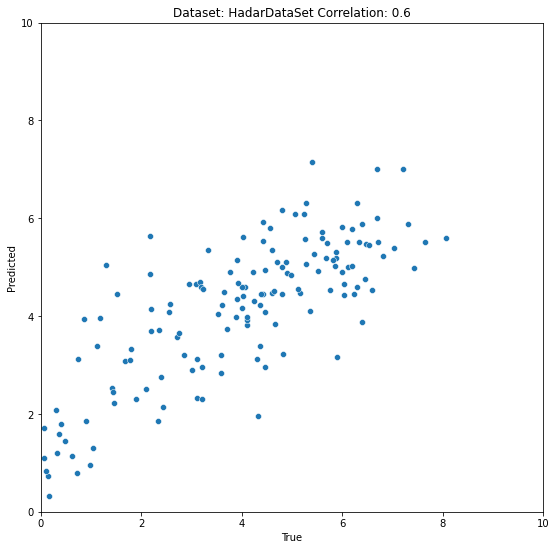

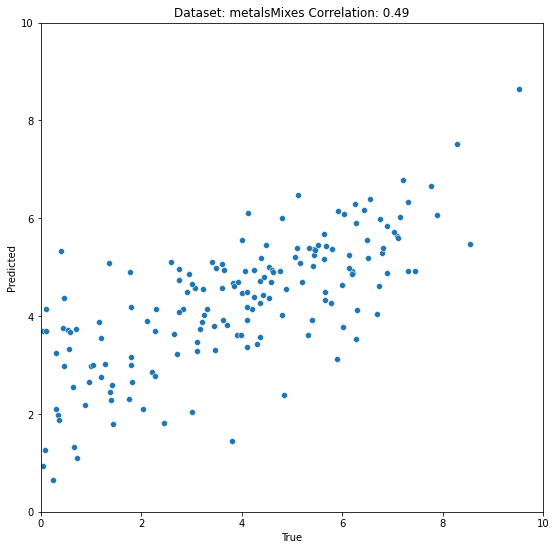

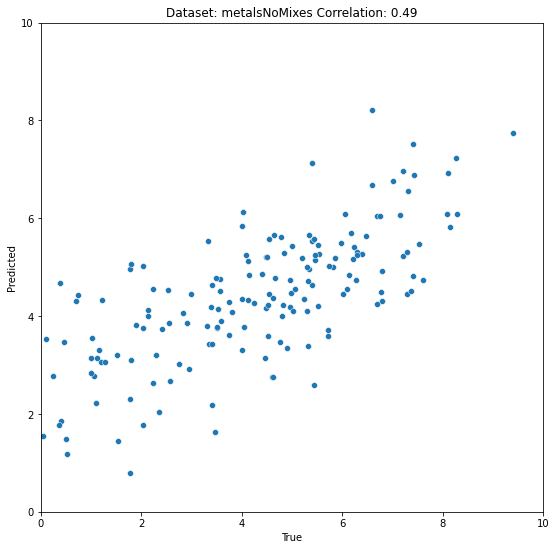

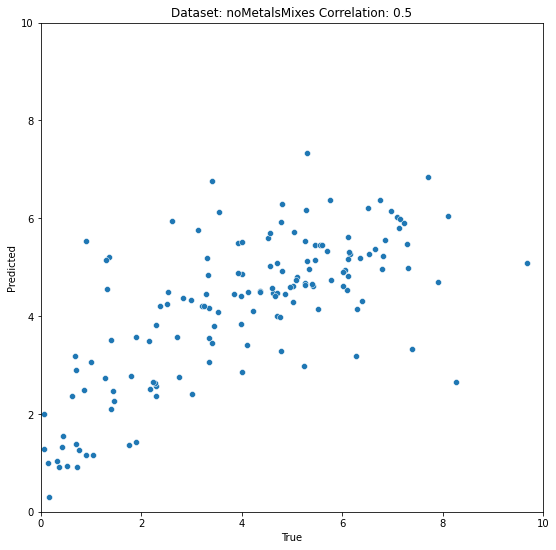

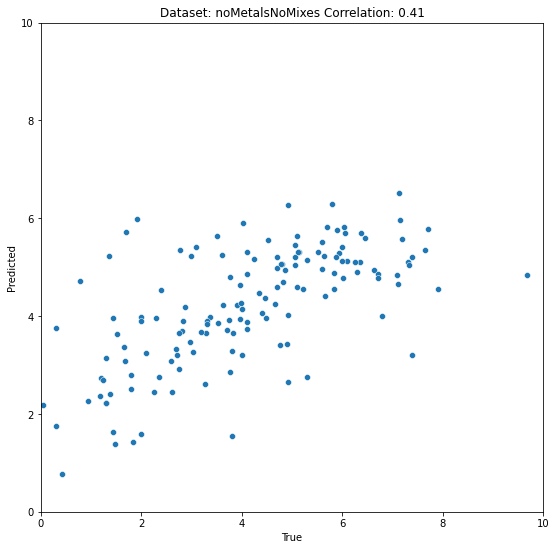

In [145]:
blunt_model(train_test_sets_global)

In [239]:
blunt_model(train_test_sets_families)

Dataset: triphenylamine
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       207
           1       0.68      0.31      0.43        74

    accuracy                           0.78       281
   macro avg       0.73      0.63      0.64       281
weighted avg       0.76      0.78      0.75       281

Dataset: other
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       150
           1       0.83      0.53      0.65        38

    accuracy                           0.88       188
   macro avg       0.86      0.75      0.79       188
weighted avg       0.88      0.88      0.87       188

Dataset: phenothiazine
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        86
           1       0.33      0.17      0.23        35

    accuracy                           0.66       121
   macro avg       0.53      0.52      0.50       121
weighted avg

C:\Users\clarkep\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\clarkep\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\clarkep\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2>RFE</h2>

In [146]:
def multi_rfeCV(input_train_test_sets):
    for dataset in input_train_test_sets:
        X_train = input_train_test_sets[dataset]['X_train']
        Y_train = input_train_test_sets[dataset]['Y_train']
        
        model = RandomForestRegressor()
        
        rfeCV = RFECV(
            estimator=model,
            step=200,
            cv=2,
            scoring='r2',
            min_features_to_select=1
        )
        
        rfeCV.fit(X_train, Y_train)
        
        plt.figure()
        plt.plot(
                 rfeCV.grid_scores_
                )
        plt.xlabel("Proportion of data (n/6)")
        plt.ylabel("Cross validation score (r2)")
        plt.title(f"Datase: {dataset}, Best n_features: {rfeCV.n_features_}/{len(X_train.columns)}")
        plt.show()

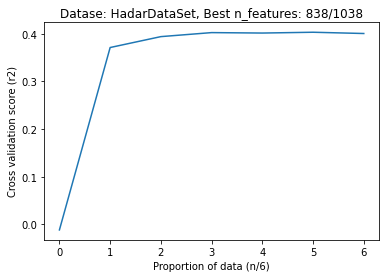

KeyboardInterrupt: 

In [191]:
multi_rfeCV(train_test_sets_global)

In [109]:
def multi_rfe(input_train_test_sets):
    new_dict = dict()
    for dataset in input_train_test_sets:
        train_test = dict()
        n_features = round(len(input_train_test_sets[dataset]['X_train'].columns)/3)
        X_train = input_train_test_sets[dataset]['X_train']
        Y_train = input_train_test_sets[dataset]['Y_train']
        X_test = input_train_test_sets[dataset]['X_test']
        Y_test = input_train_test_sets[dataset]['Y_test']
        
        model = RandomForestRegressor(max_features='sqrt')
        
        rfe = RFE(estimator=model, n_features_to_select=n_features, step=1)
        
        rfe.fit(X_train, Y_train)
        
        train_test['X_train'] = X_train[X_train.columns[rfe.support_]]
        train_test['X_test'] = X_test[X_test.columns[rfe.support_]]
        train_test['Y_train'] = Y_train
        train_test['Y_test'] = Y_test
        
        new_dict[dataset] = train_test
        
    return new_dict

In [ ]:
trimmed_train_test = multi_rfe(train_test_sets)

In [98]:
trimmed_train_test_families = multi_rfe(train_test_sets_families)

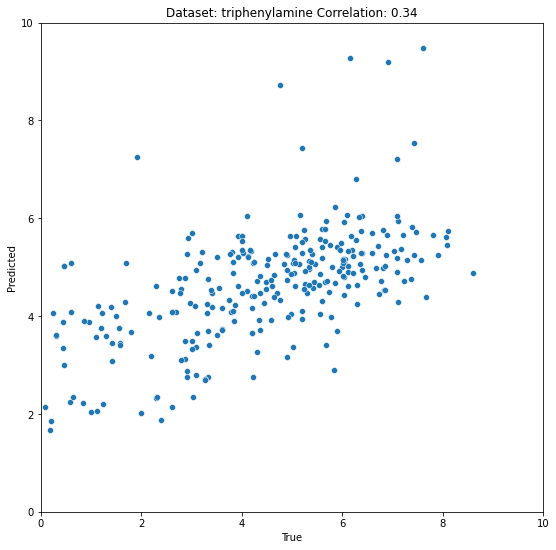

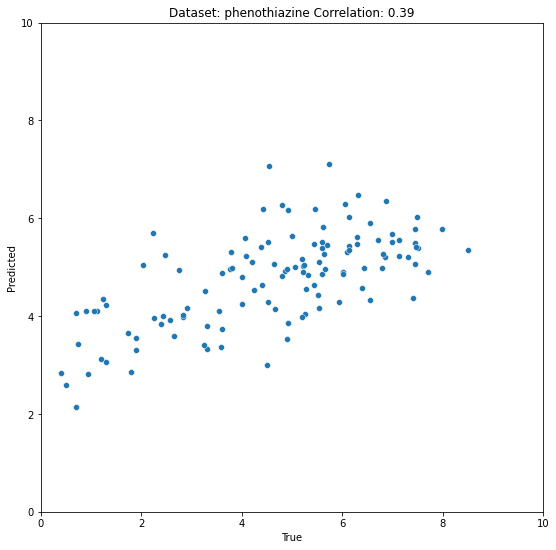

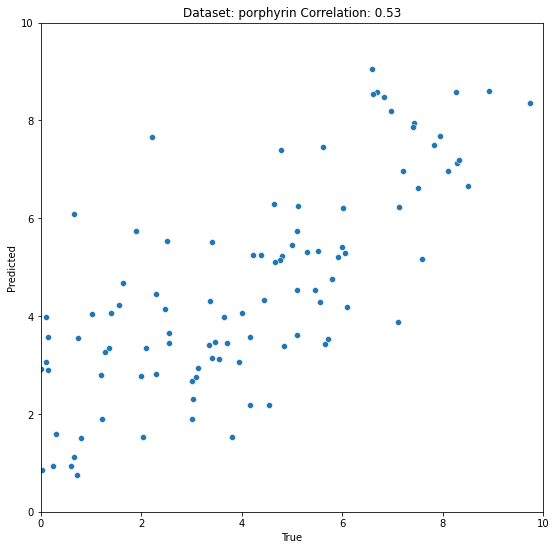

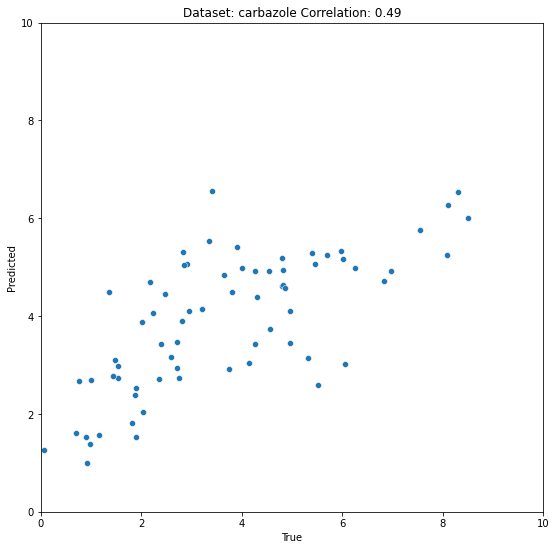

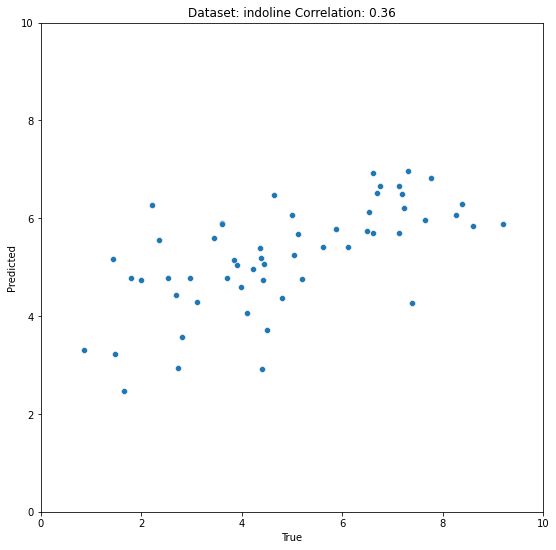

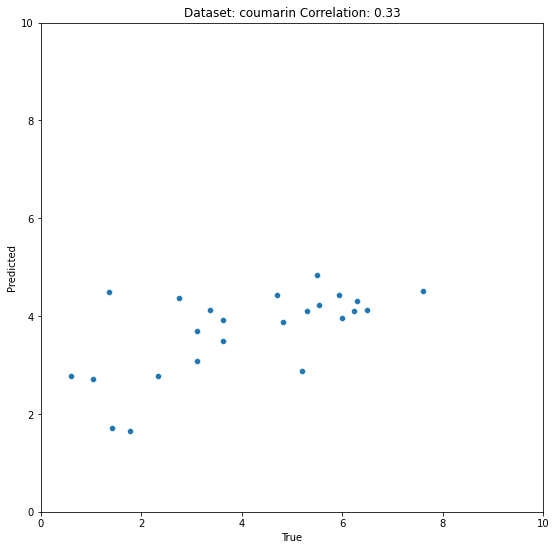

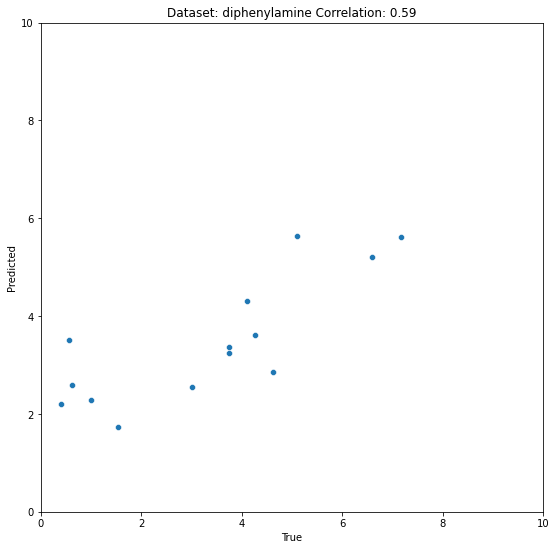

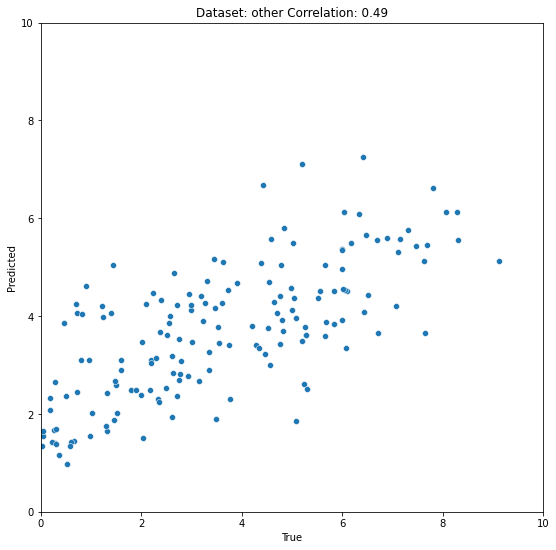

In [129]:
blunt_model(train_test_sets_families)

C:\Users\clarkep\AppData\Local\Temp/ipykernel_50120/3076897604.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(global_X_train_df, global_Y_train_df)


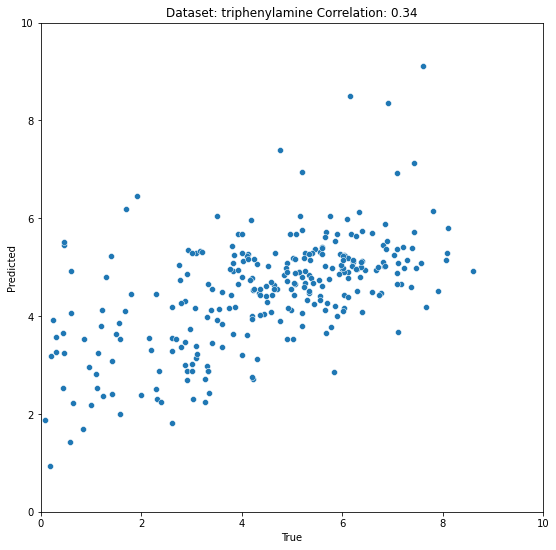

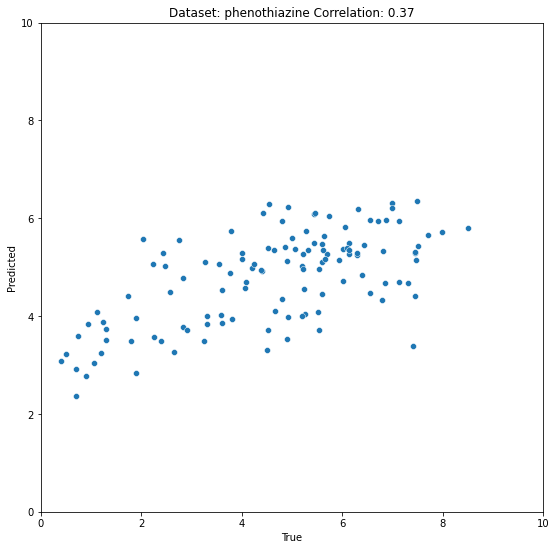

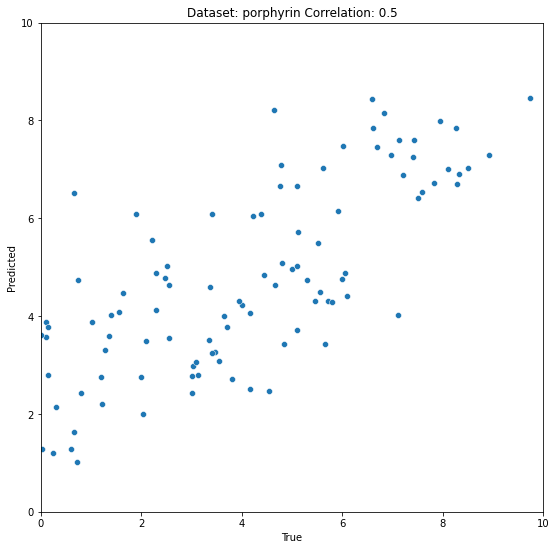

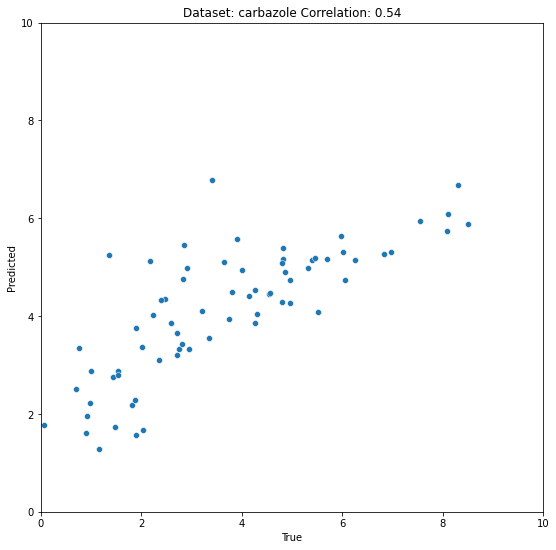

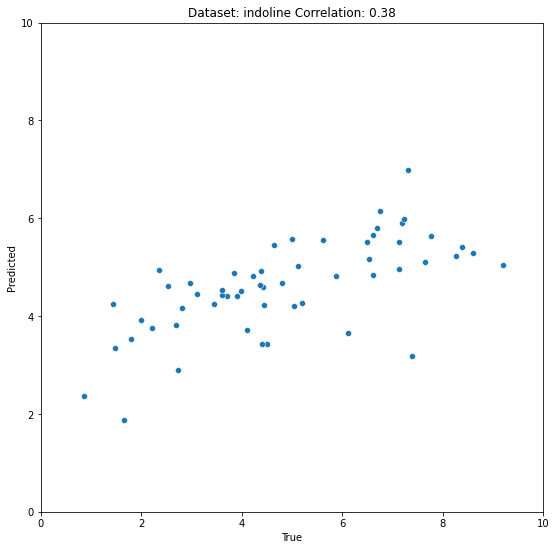

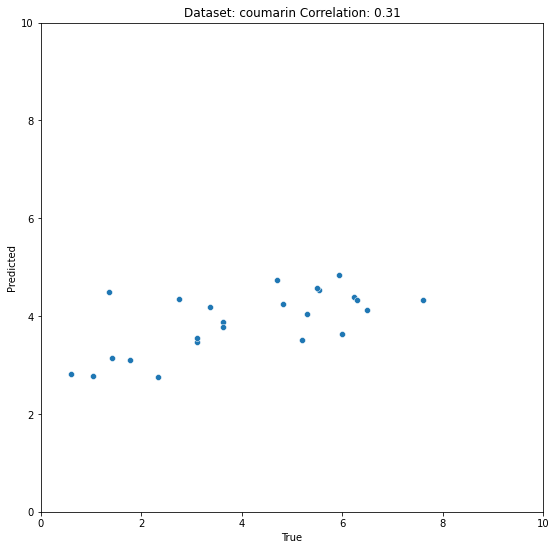

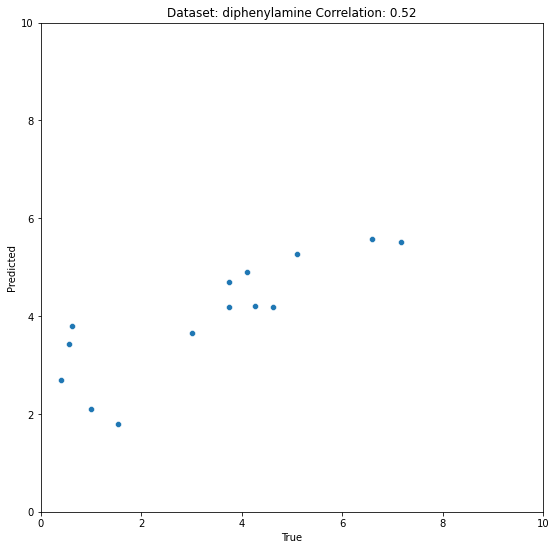

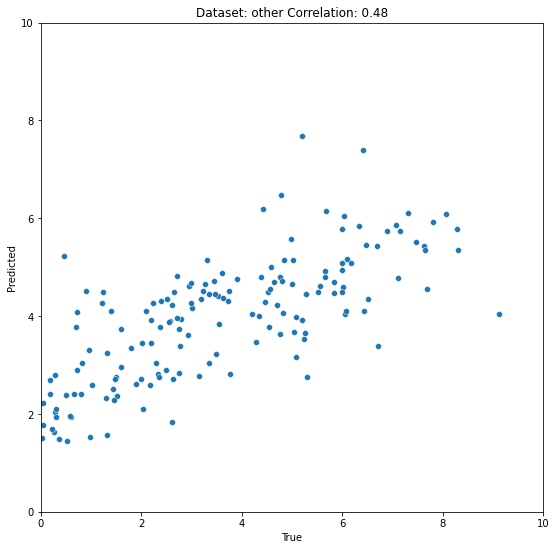

In [127]:
global_transferL_model(train_test_sets_families)